In [1]:
from sympy import*
%matplotlib inline
from __future__ import division
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer = True)
f, g, h = symbols('f g h', cls = Function)
import math

In [2]:
def f(x):
    return (x + x**(0.5))*((20 - x) + (20 - x)**(0.5)) - 155.55

In [3]:
diff(f(x), x)

(0.5*x**(-0.5) + 1)*(-x + (-x + 20)**0.5 + 20) + (x**0.5 + x)*(-0.5*(-x + 20)**(-0.5) - 1)

In [4]:
def fprime(x):
    return (0.5*x**(-0.5) + 1)*(-x + (-x + 20)**0.5 + 20) + (x**0.5 + x)*(-0.5*(-x + 20)**(-0.5) - 1)

In [5]:
def bisection(a, b, tol, numIter):
    iterr = 1
    fa = f(a)
    while iterr < numIter:
        p = (b - a) / 2 + a
        fp = f(p)
        print('iterr = %d, a = %.5f, b = %.5f, p = %.5f, f(p) = %.5f'%(iterr, a, b, p, fp))
        #if (fp == 0 or abs(fp) < tol ): 
        #different tolerance y condition x condition (they can differ a lot)
        if (fp == 0 or (b - a)/2 < tol):
            break
        iterr = iterr + 1
        if (fp * fa < 0):
            b = p
            fb = fp
        else:
            a = p
            fa = fp
    return p, fp

In [6]:
def Newton (initialPoint, tol, numIter):
    iterr = 1
    while iterr < numIter:
        p = initialPoint - (f(initialPoint) / fprime(initialPoint))
        
        print('iterr = %d, p_0 = %.5f, p = %.5f'%(iterr, initialPoint, p))

        #if (abs(p - initialPoint) < tol):
        if (abs(f(p)) < tol):
            break
        iterr = iterr + 1
        initialPoint = p
        
    return p

In [7]:
def secant (p0, p1, tol, numIter):
    iterr = 2 #p0, p1
    q0 = f(p0)
    q1 = f(p1)
    while iterr < numIter:
        
        p = p1 -  q1 *(p1 - p0)/(q1 - q0)
        
        print('iterr = %d, p_%d = %.5f, p_%d = %.5f'%(iterr, iterr - 2, p0, iterr - 1, p1))

        if (abs(p - p1) < tol):
            break
        iterr = iterr + 1
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    return p

In [12]:
b1, b2 = bisection(5, 7.5, 0.00001, 50)

iterr = 1, a = 5.00000, b = 7.50000, p = 6.25000, f(p) = -2.79163
iterr = 2, a = 6.25000, b = 7.50000, p = 6.87500, f(p) = 3.50465
iterr = 3, a = 6.25000, b = 6.87500, p = 6.56250, f(p) = 0.50384
iterr = 4, a = 6.25000, b = 6.56250, p = 6.40625, f(p) = -1.10690
iterr = 5, a = 6.40625, b = 6.56250, p = 6.48438, f(p) = -0.29230
iterr = 6, a = 6.48438, b = 6.56250, p = 6.52344, f(p) = 0.10808
iterr = 7, a = 6.48438, b = 6.52344, p = 6.50391, f(p) = -0.09154
iterr = 8, a = 6.50391, b = 6.52344, p = 6.51367, f(p) = 0.00841
iterr = 9, a = 6.50391, b = 6.51367, p = 6.50879, f(p) = -0.04153
iterr = 10, a = 6.50879, b = 6.51367, p = 6.51123, f(p) = -0.01655
iterr = 11, a = 6.51123, b = 6.51367, p = 6.51245, f(p) = -0.00406
iterr = 12, a = 6.51245, b = 6.51367, p = 6.51306, f(p) = 0.00218
iterr = 13, a = 6.51245, b = 6.51306, p = 6.51276, f(p) = -0.00094
iterr = 14, a = 6.51276, b = 6.51306, p = 6.51291, f(p) = 0.00062
iterr = 15, a = 6.51276, b = 6.51291, p = 6.51283, f(p) = -0.00016
iterr = 16

In [11]:
n = Newton(6, 0.00001, 50)

iterr = 1, p_0 = 6.00000, p = 6.47877
iterr = 2, p_0 = 6.47877, p = 6.51268
iterr = 3, p_0 = 6.51268, p = 6.51285


In [10]:
s = secant (5, 7.5, 0.00001, 50)

iterr = 2, p_0 = 5.00000, p_1 = 7.50000
iterr = 3, p_1 = 7.50000, p_2 = 6.71859
iterr = 4, p_2 = 6.71859, p_3 = 6.47685
iterr = 5, p_3 = 6.47685, p_4 = 6.51397
iterr = 6, p_4 = 6.51397, p_5 = 6.51285


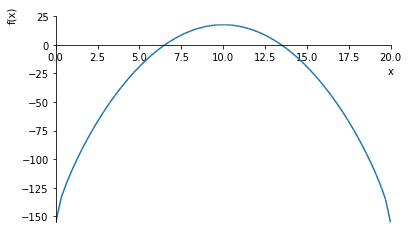

In [8]:
plot(f(x), (x, 0, 20))